<a href="https://colab.research.google.com/github/ArmaghanAb/CreditCard_Fraud_Detection/blob/main/CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection:


### Import the Necessary Libraries :

In [ ]:
# Mounting Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the CSV file and store it in a DataFrame named "data"
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
# Display the first five rows of the DataFrame to verify that the data was loaded correctly
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [ ]:
# Display the dimensions of the DataFrame
data.shape

(284807, 31)

In [ ]:
# Display the column names of the DataFrame
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Data Info :

In [ ]:
 # command provides essential information about the dataset, including the number of rows and columns, the data type of each column, and the number of non-null values in each column. 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

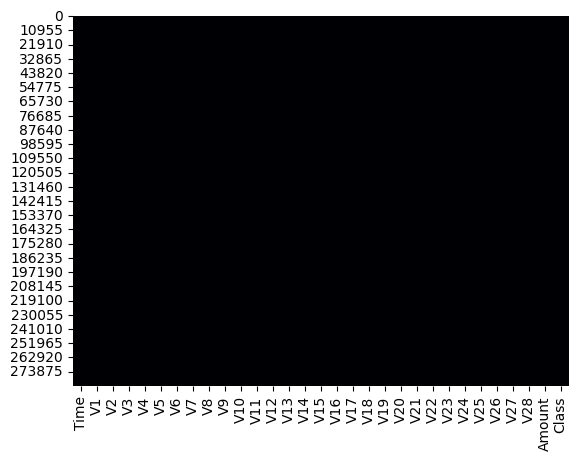

In [ ]:
# Code to verify the absence of null values in the data
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


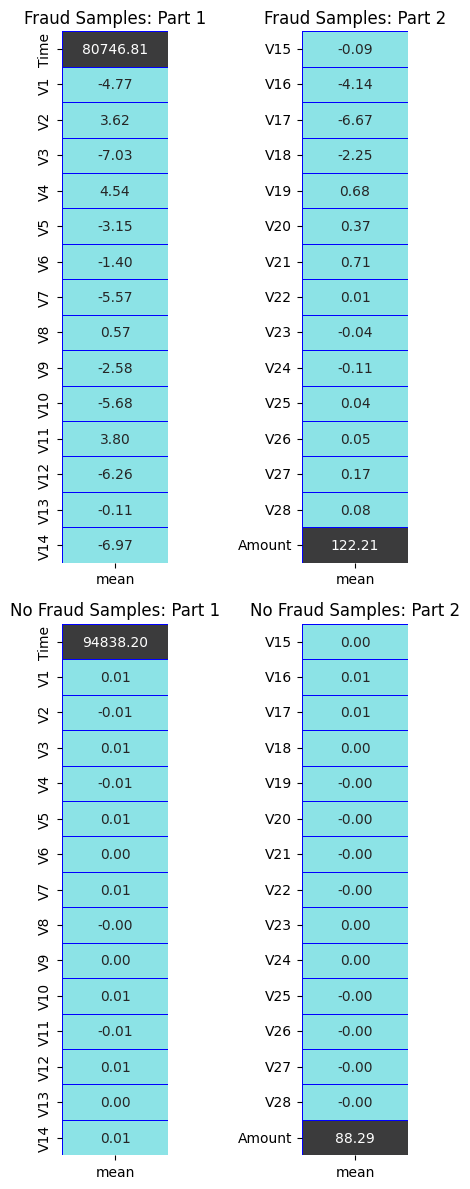

In [ ]:
 #creates a visualization of mean values of features for fraud and no-fraud cases in a dataset.
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#8ce3e6','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (4,12))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'blue',cbar = False,fmt = '.2f')
plt.title('Fraud Samples: Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'blue',cbar = False,fmt = '.2f')
plt.title('Fraud Samples: Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'blue',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples: Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'blue',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples: Part 2');

fig.tight_layout(w_pad = 5)

- Mean values of features for Fraud & No Fraud cases
- For No Fraud cases, V1 - V28 mean values are almost 0 for all the cases. Mean Amount, 88.29, is less than the mean transaction amount, 122.21, of the Fraud cases.
- Time taken for No Fraud transactions is more than those for Fraud transactions.
- These could be some of the indicators for detecting fraud transactions.

## <center>Data Visualization</center>

Text(0.5, 1.0, 'Number of Fraud Cases')

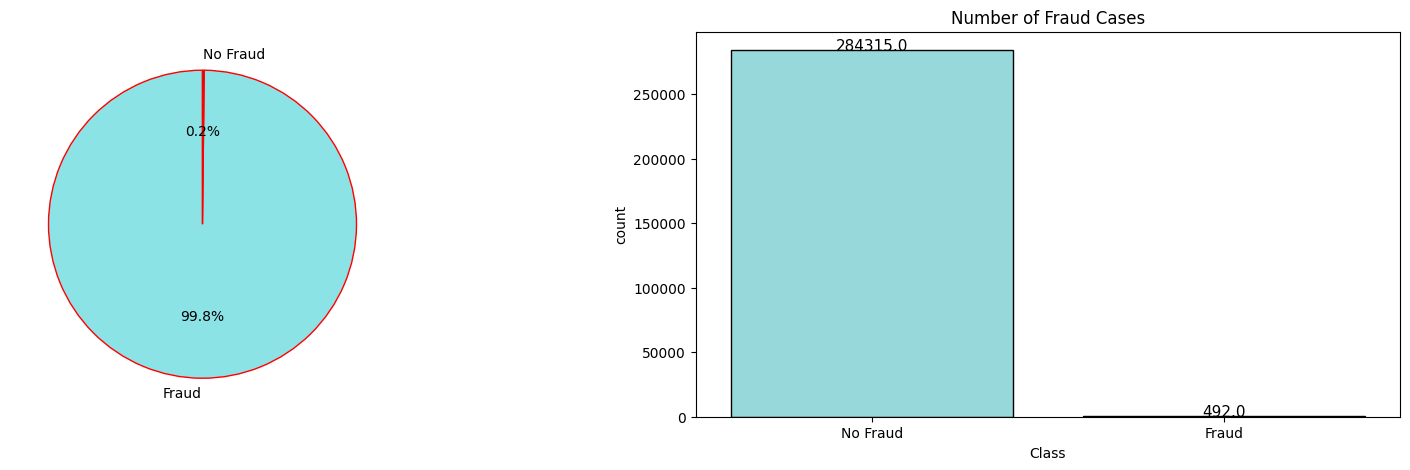

In [ ]:
#A pie chart and a countplot to show the percentage and number of fraud and non-fraud cases in the dataset
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'red','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='Class',data=data,edgecolor='black',palette=colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

##Feature Selection

### Correlation Matrix :

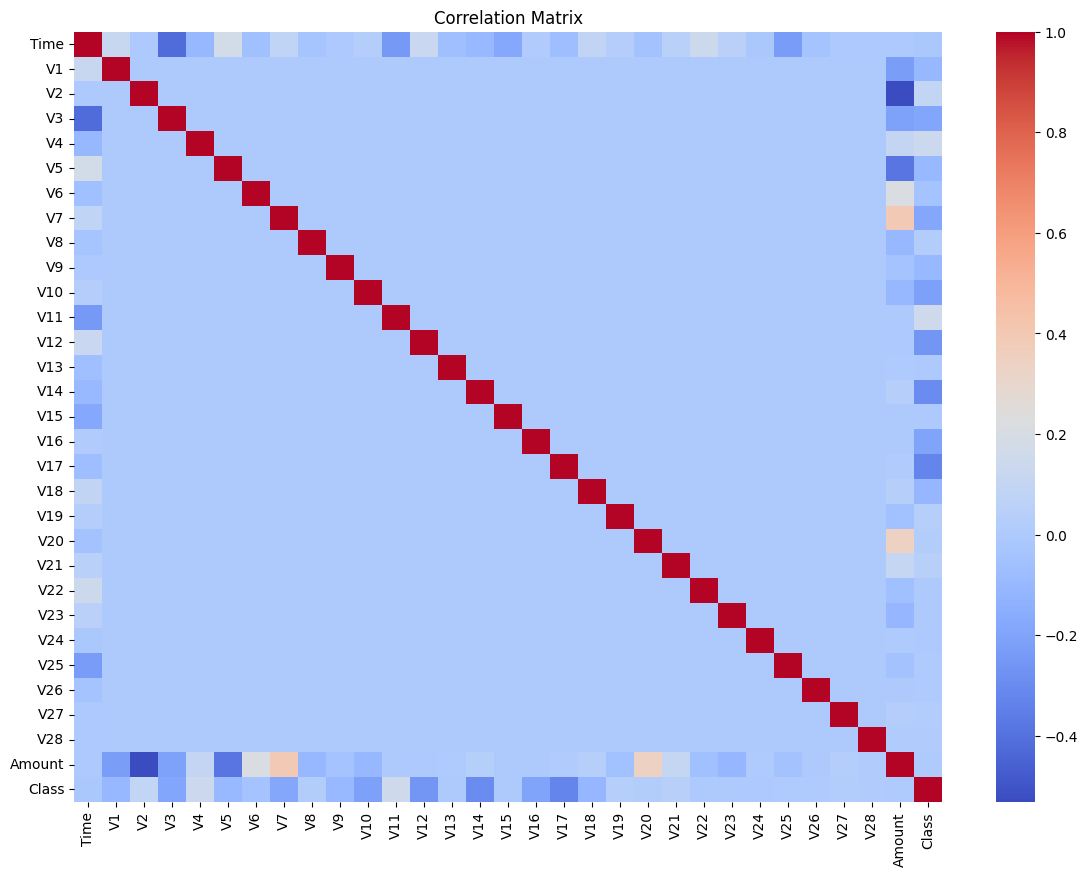

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(data.corr(), cmap='coolwarm', ax=ax, cbar=True)
ax.set_title('Correlation Matrix')
plt.show()


### Target Variable Visualization (Class) : 

### ANOVA Test :
To select the most relevant features, we will remove any features that have correlation values falling within the range of -0.1 to 0.1. Among the remaining features, V4 and V11 have a positive correlation with the Class feature, while V7, V3, V16, V10, V12, V14, and V17 have a negative correlation with the Class feature.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

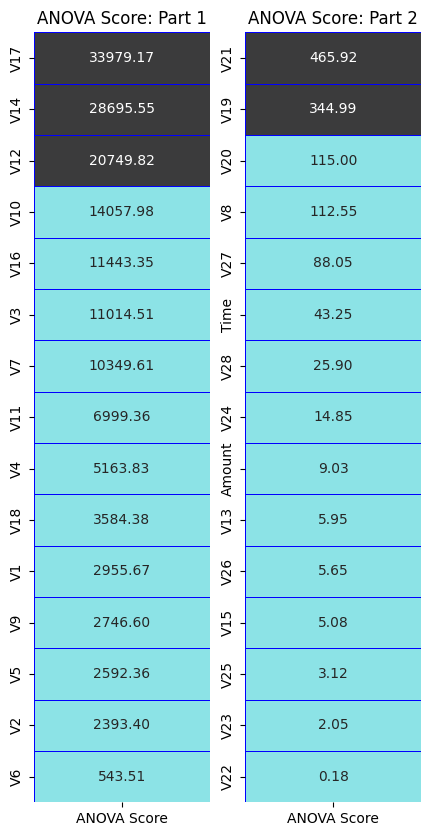

In [ ]:
# Split the data into features and target
features = data.iloc[:, 0:-1]
target = data.iloc[:, -1]

# Set the SelectKBest parameters
k = 'all'
score_func = f_classif
best_features = SelectKBest(score_func=score_func, k=k)

# Fit and transform the features using SelectKBest
fit = best_features.fit(features, target)

# Create a DataFrame of ANOVA scores with the feature names as index
feature_scores = pd.DataFrame({'ANOVA Score': fit.scores_}, index=features.columns)

# Sort the features by ANOVA score in descending order
feature_scores = feature_scores.sort_values('ANOVA Score', ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,10))

# Plot the heatmap for the first 15 features on the first subplot
sns.heatmap(feature_scores.iloc[:15,:], annot=True, cmap=colors, linewidths=0.4, linecolor='blue', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('ANOVA Score: Part 1')

# Plot the heatmap for the next 15 features on the second subplot
sns.heatmap(feature_scores.iloc[15:30], annot=True, cmap=colors, linewidths=0.4, linecolor='blue', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('ANOVA Score: Part 2')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.2)



In [ ]:
cols = ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']
df1 = data[cols].copy()
df1.head()


,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


#### Dataset for Model based on ANOVA Score :

In [ ]:
df2 = data.copy(deep = True)
df2.drop(columns = list(feature_scores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


##<center>Data Balancing</center>

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### Data Balancing for Model based on Correlation Plot :

In [ ]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4920, 1: 2460})

#### Data Balancing for Model based on ANOVA Score :

In [ ]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 4920, 1: 2460})

# <center>Models</center>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

In [ ]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score: ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # Obtaining predicted probabilities or decision function values
    y_scores = classifier.predict_proba(x_test)[:, 1]  # Assuming binary classification

    # Calculating ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Plotting ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_scores))
    roc_display.plot(color='green')
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Greens',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 1) Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

#### Model based on Correlation Plot :

Cross Validation Score:  98.14%
ROC_AUC Score:  92.65%


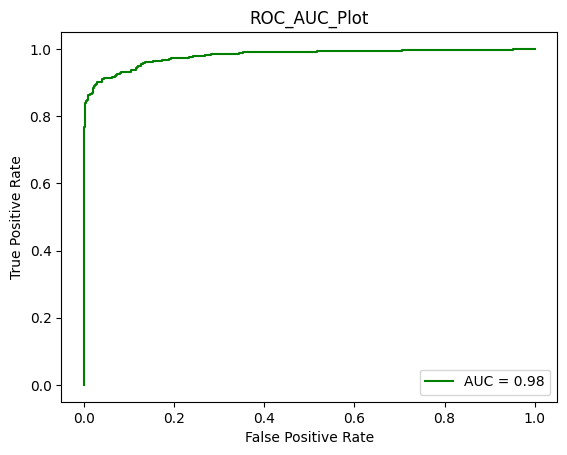

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.97      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.95      0.93      0.94      1476
weighted avg       0.95      0.95      0.94      1476



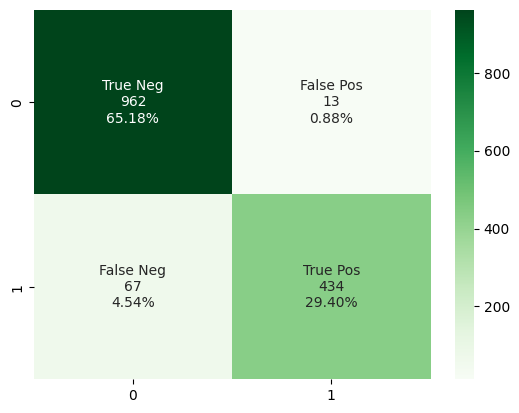

In [ ]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score:  98.43%
ROC_AUC Score:  93.30%


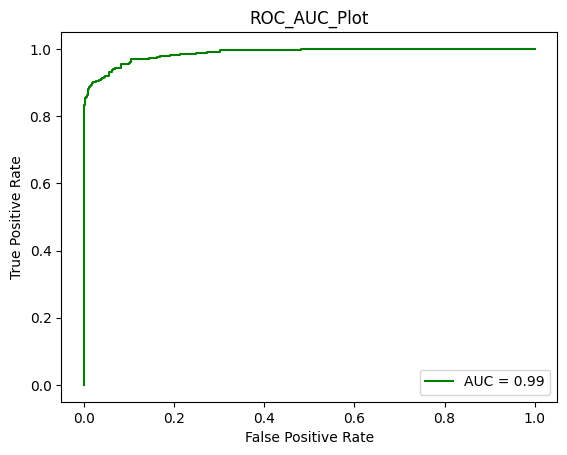

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.98      0.88      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



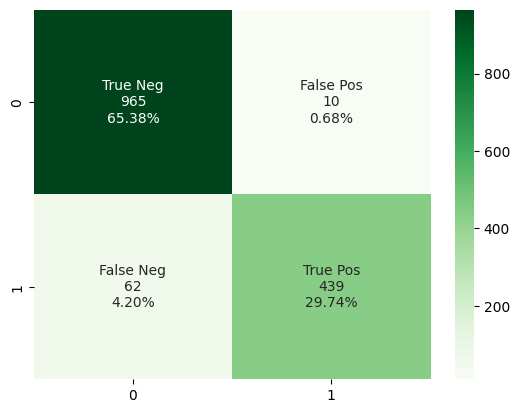

In [ ]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

### 2) Support Vector Classifier :

In [ ]:
from sklearn.svm import SVC

#### Model based on Correlation Plot :

Cross Validation Score:  98.05%
ROC_AUC Score:  92.20%


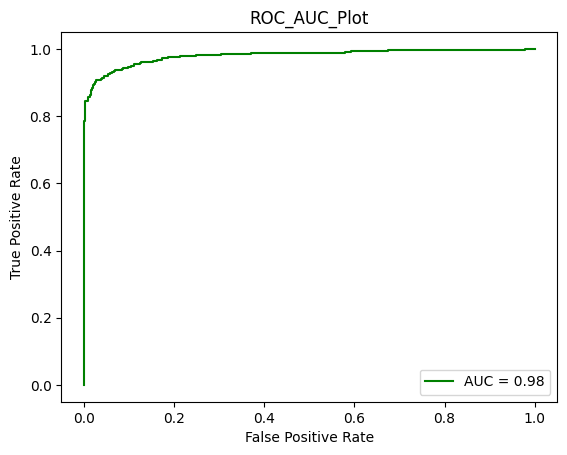

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.98      0.85      0.91       501

    accuracy                           0.94      1476
   macro avg       0.95      0.92      0.94      1476
weighted avg       0.95      0.94      0.94      1476



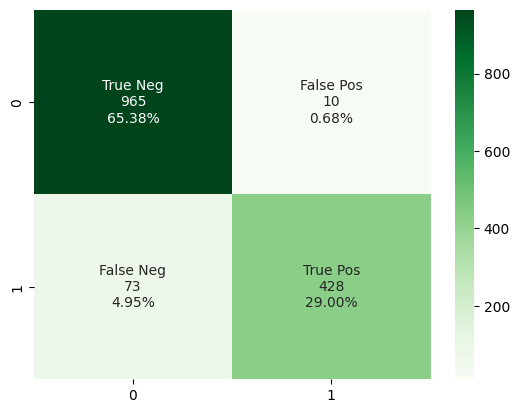

In [ ]:
classifier_svc = SVC(kernel = 'linear',C = 0.1, probability=True)
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score:  98.24%
ROC_AUC Score:  93.01%


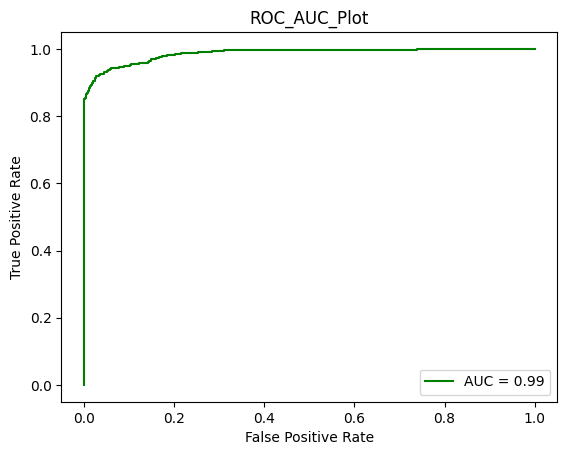

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.99      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



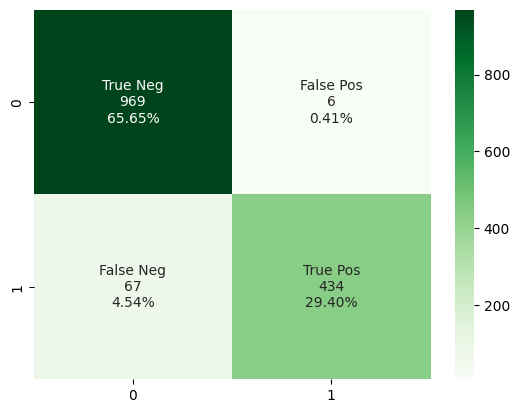

In [ ]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

### 3) Decision Tree Classifier :

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### Model based on Correlation Plot :

Cross Validation Score:  97.14%
ROC_AUC Score:  93.19%


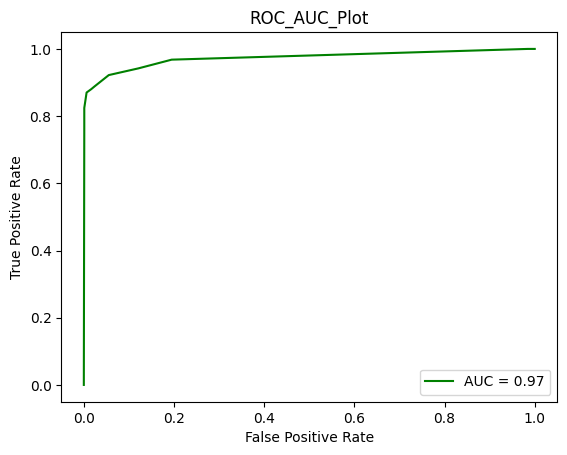

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       975
           1       0.96      0.88      0.92       501

    accuracy                           0.95      1476
   macro avg       0.95      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



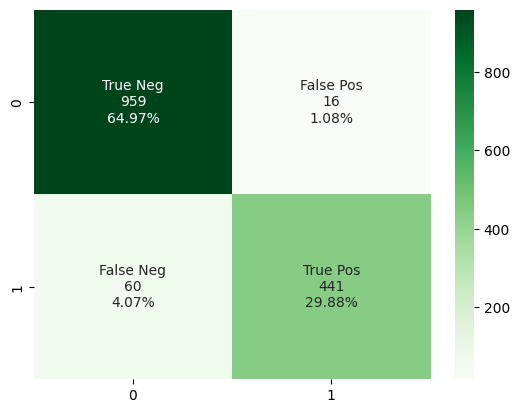

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

#### Model based on ANOVA Score :

Due to the dataset containing an overwhelming number of features, it has become challenging to comprehend the information it holds. As a solution, we will generate a correlation map that solely displays the relationship between the target variable and other variables.

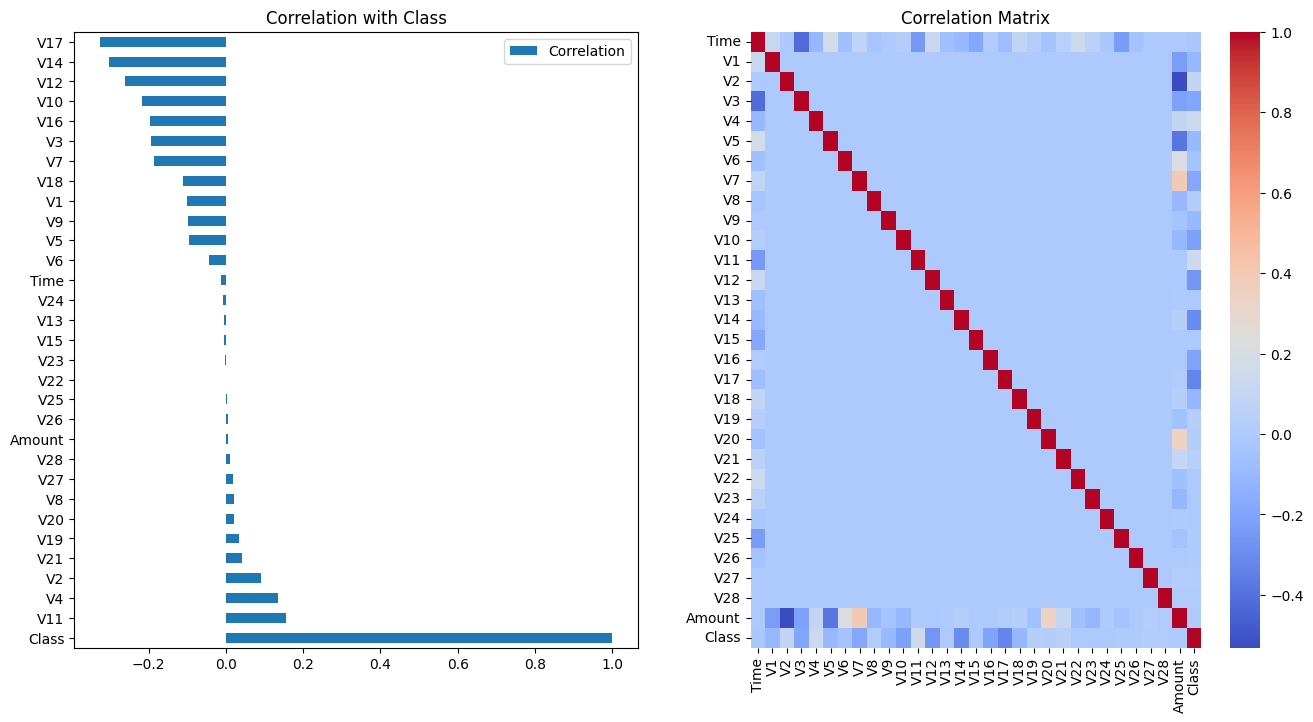

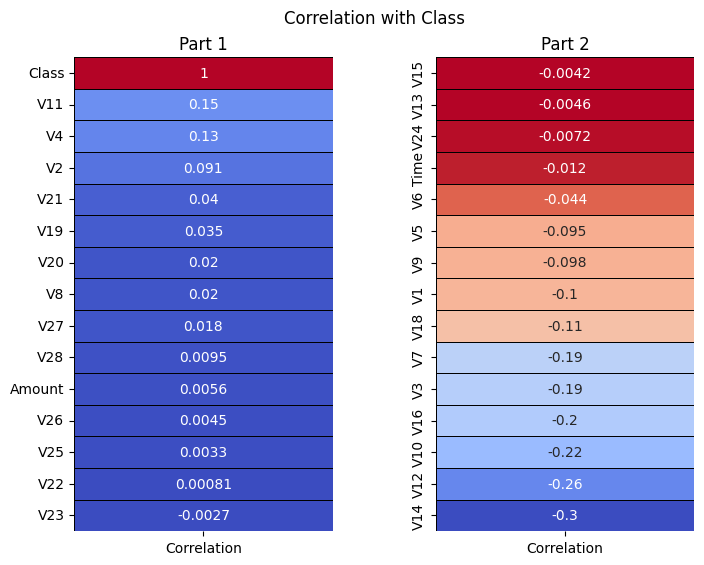

In [ ]:
# Compute correlations
corr = data.corrwith(data['Class']).sort_values(ascending=False).to_frame(name='Correlation')

# Create figure and axes
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot bar chart of correlations
corr.plot(kind='barh', ax=ax1)
ax1.set_title('Correlation with Class')

# Plot heatmap of correlations
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, ax=ax2)
ax2.set_title('Correlation Matrix')


# Select top 15 correlated features
top_corr = corr.iloc[:15, :]

# Create figure and axes
fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=2)

# Plot heatmap of correlations
sns.heatmap(top_corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', cbar=False, ax=axs[0])
axs[0].set_title('Part 1')


# Select next 15 correlated features
next_corr = corr.iloc[15:30, :]

# Plot heatmap of correlations
sns.heatmap(next_corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', cbar=False, ax=axs[1])
axs[1].set_title('Part 2')

# Set suptitle and adjust subplot spacing
fig.suptitle('Correlation with Class')
fig.subplots_adjust(top=0.9, wspace=0.4, hspace=0.4)

# Show the plot
plt.show()


Cross Validation Score:  97.37%
ROC_AUC Score:  92.80%


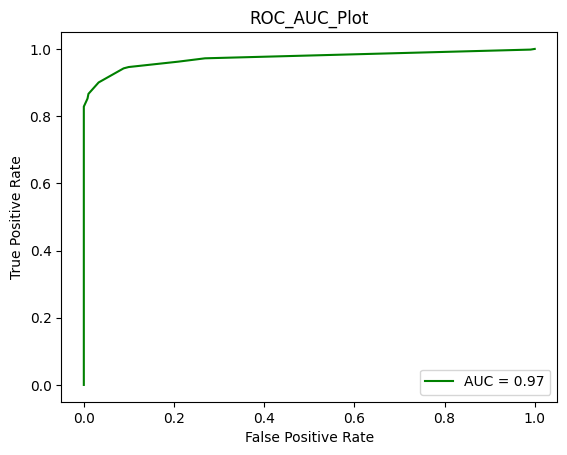

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.98      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



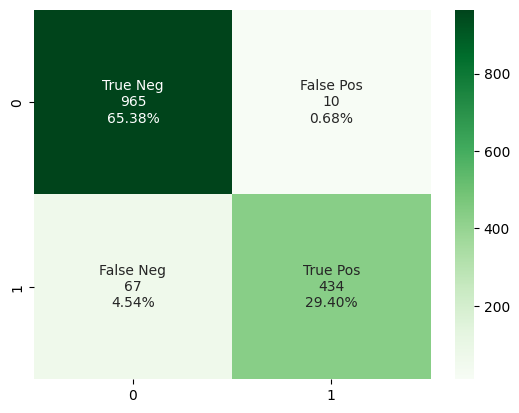

In [ ]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

### 4) Random Forest Classifier : 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Model based on Correlation Plot :

Cross Validation Score:  98.08%
ROC_AUC Score:  92.56%


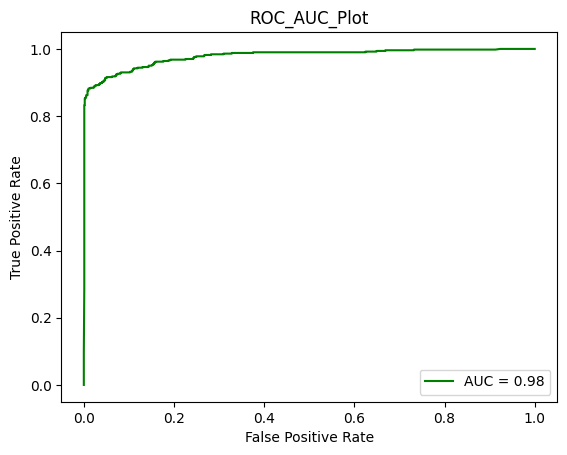

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.99      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



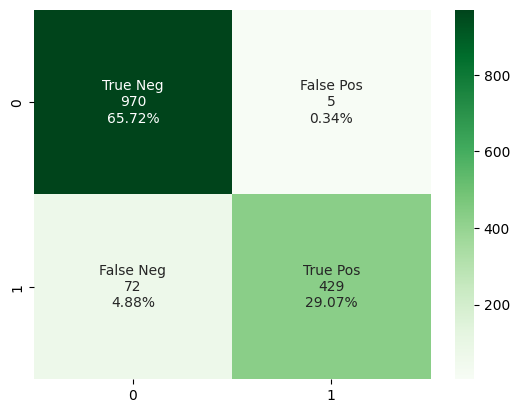

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score:  98.14%
ROC_AUC Score:  92.42%


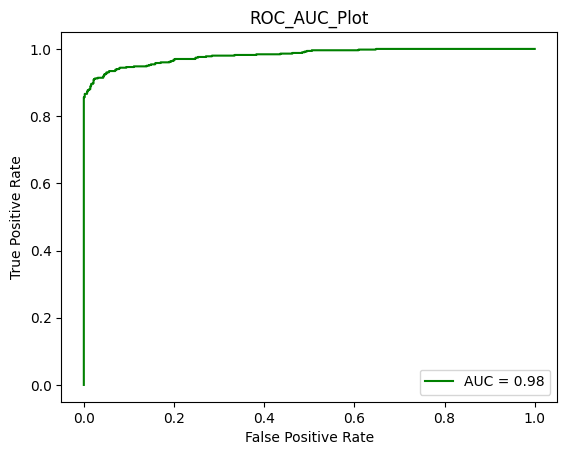

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       1.00      0.85      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.92      0.94      1476
weighted avg       0.95      0.95      0.95      1476



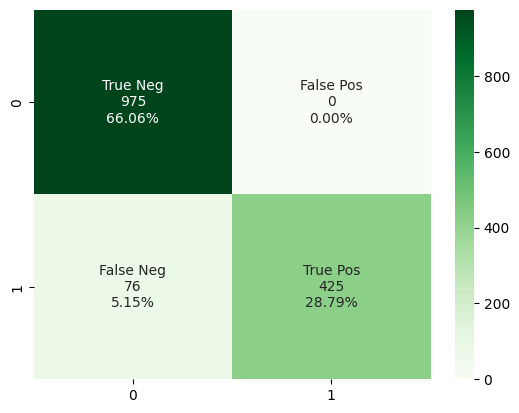

In [ ]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

### 5) K-Nearest Neighbors :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Model based on Correlation Plot :

Cross Validation Score:  99.23%
ROC_AUC Score:  98.08%


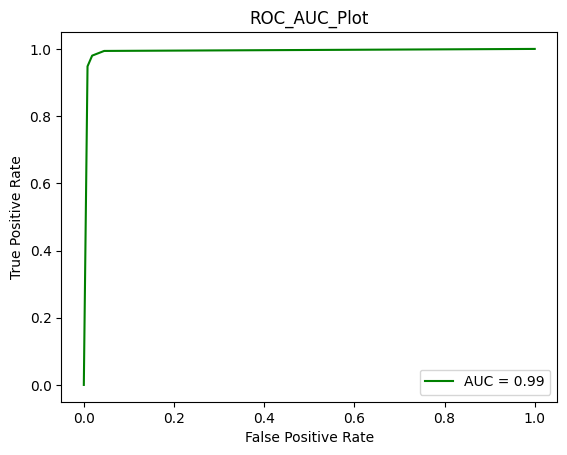

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       975
           1       0.96      0.98      0.97       501

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



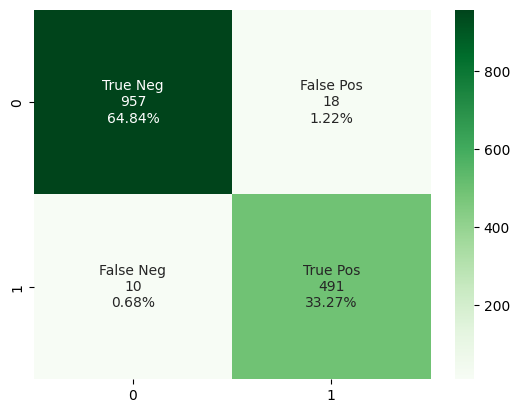

In [ ]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score:  99.42%
ROC_AUC Score:  98.52%


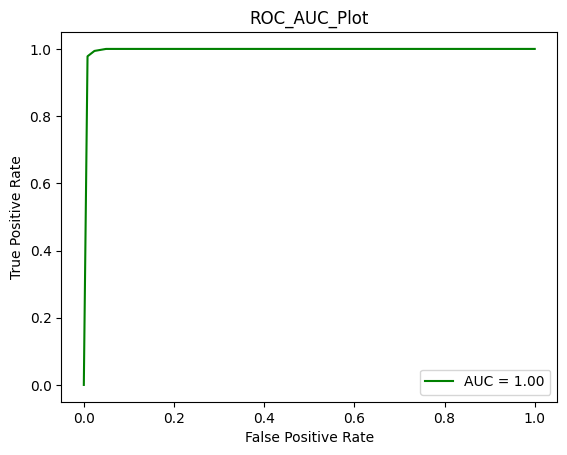

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       975
           1       0.96      0.99      0.97       501

    accuracy                           0.98      1476
   macro avg       0.98      0.99      0.98      1476
weighted avg       0.98      0.98      0.98      1476



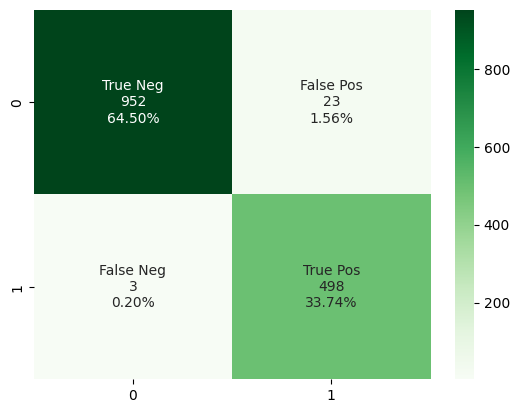

In [ ]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)